### Goal is to check which customers are at a high risk of churn

Steps to be followed:
- Data understanding
- Data cleaning
- Standardizing the data and splitting
- Feature engineering
- Build the predictive model
- Check the prediction score and accuracy for train and test data 

STEP 1 DATA UNDERSTANDING

In [1]:
#Importing the libraries

#Data Structures
import pandas as pd
import numpy as np
import re

#Sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

#Plotting
import matplotlib.pyplot as plt
import seaborn as sns

#Others
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
#Some common reusable functions

#null value checker
def null_value(dataframe):
    pd.set_option('display.max_rows',None)
    res=dataframe.isna().mean()*100
    print(res)

Load the dataset

In [3]:
df=pd.read_csv("train.csv")
df_dict=pd.read_csv("data_dictionary.csv")

In [4]:
df.shape

(69999, 172)

In [5]:
pd.set_option('display.max_columns',None)
df.head()

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
0,0,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,31.277,87.009,7.527,48.58,124.38,1.29,32.24,96.68,2.33,0.00,0.0,0.0,0.00,0.0,0.00,2.23,0.00,0.28,5.29,16.04,2.33,0.00,0.00,0.00,0.00,0.00,0.00,7.53,16.04,2.61,46.34,124.38,1.01,18.75,80.61,0.0,0.00,0.0,0.0,0.0,0.0,0.0,65.09,204.99,1.01,0.0,0.0,0.0,8.20,0.63,0.00,0.38,0.0,0.0,81.21,221.68,3.63,2.43,3.68,7.79,0.83,21.08,16.91,0.00,0.00,0.00,3.26,24.76,24.71,0.00,7.61,0.21,7.46,19.96,14.96,0.0,0.0,0.0,0.0,0.0,0.0,7.46,27.58,15.18,11.84,53.04,40.56,0.0,0.0,0.66,0.0,0.0,0.0,1.11,0.69,0.00,3,2,2,77,65,10,65,65,10,6/22/2014,7/10/2014,8/24/2014,65,65,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.00,0.00,0.0,0.00,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,1958,0.0,0.0,0.0,0
1,1,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,0.000,122.787,42.953,0.00,0.00,0.00,0.00,25.99,30.89,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,22.01,29.79,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.00,30.73,31.66,0.00,0.0,0.0,0.00,30.73,31.66,1.68,19.09,10.53,1.41,18.68,11.09,0.35,1.66,3.40,3.44,39.44,25.03,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,3.44,39.44,25.04,0.0,0.0,0.01,0.0,0.0,0.0,0.00,0.00,0.00,3,4,5,0,145,50,0,145,50,6/12/2014,7/10/2014,8/26/2014,0,0,0,NaN,7/8/2014,NaN,NaN,1.0,NaN,NaN,145.0,NaN,NaN,0.0,NaN,NaN,1.0,NaN,Na

In [6]:
df_dict

,Acronyms,Description
0,CIRCLE_ID,Telecom circle area to which the customer belo...
1,LOC,Local calls within same telecom circle
2,STD,STD calls outside the calling circle
3,IC,Incoming calls
4,OG,Outgoing calls
5,T2T,Operator T to T ie within same operator mobile...
6,T2M,Operator T to other operator mobile
7,T2O,Operator T to other operator fixed line
8,T2F,Operator T to fixed lines of T
9,T2C,Operator T to its own call center


In [7]:
df.info(verbose=1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69999 entries, 0 to 69998
Data columns (total 172 columns):
 #    Column                    Dtype  
---   ------                    -----  
 0    id                        int64  
 1    circle_id                 int64  
 2    loc_og_t2o_mou            float64
 3    std_og_t2o_mou            float64
 4    loc_ic_t2o_mou            float64
 5    last_date_of_month_6      object 
 6    last_date_of_month_7      object 
 7    last_date_of_month_8      object 
 8    arpu_6                    float64
 9    arpu_7                    float64
 10   arpu_8                    float64
 11   onnet_mou_6               float64
 12   onnet_mou_7               float64
 13   onnet_mou_8               float64
 14   offnet_mou_6              float64
 15   offnet_mou_7              float64
 16   offnet_mou_8              float64
 17   roam_ic_mou_6             float64
 18   roam_ic_mou_7             float64
 19   roam_ic_mou_8             float64
 20   roam

In [8]:
df.describe(include="all")

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
count,69999.000000,69999.0,69297.0,69297.0,69297.0,69999,69600,69266,69999.000000,69999.000000,69999.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.0,67312.0,66296.0,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,69999.000000,69999.000000,69999.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.0,67312.0,66296.0,67231.000000,67312.000000,66296.000000,69999.000000,69999.000000,69999.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,68898,68765,67538,69999.000000,69999.000000

In [9]:
#printing the number of categorical numerical and id columns
data_type=df.dtypes
print(data_type)

id                     int64
circle_id              int64
loc_og_t2o_mou       float64
std_og_t2o_mou       float64
loc_ic_t2o_mou       float64
                      ...   
aon                    int64
aug_vbc_3g           float64
jul_vbc_3g           float64
jun_vbc_3g           float64
churn_probability      int64
Length: 172, dtype: object


In [10]:
data_type_counts = data_type.value_counts()
print(data_type_counts)


float64    135
int64       28
object       9
Name: count, dtype: int64


In [11]:
null_values=df.isna().mean()*100


In [12]:
columns_above_30 = null_values[null_values > 30]
max_columns_above_30 = len(columns_above_30)

# Display the result
print(f"Number of columns with more than 30% null values: {max_columns_above_30}")

Number of columns with more than 30% null values: 30


In [13]:
unique_values=np.round(df.nunique())
pd.set_option('display.max_rows', None)
unique_values

id                          69999
circle_id                       1
loc_og_t2o_mou                  1
std_og_t2o_mou                  1
loc_ic_t2o_mou                  1
last_date_of_month_6            1
last_date_of_month_7            1
last_date_of_month_8            1
arpu_6                      61615
arpu_7                      61425
arpu_8                      60194
onnet_mou_6                 20057
onnet_mou_7                 20076
onnet_mou_8                 19725
offnet_mou_6                26254
offnet_mou_7                26139
offnet_mou_8                25995
roam_ic_mou_6                5306
roam_ic_mou_7                4240
roam_ic_mou_8                4252
roam_og_mou_6                6568
roam_og_mou_7                5305
roam_og_mou_8                5215
loc_og_t2t_mou_6            11491
loc_og_t2t_mou_7            11359
loc_og_t2t_mou_8            11296
loc_og_t2m_mou_6            17848
loc_og_t2m_mou_7            17641
loc_og_t2m_mou_8            17616
loc_og_t2f_mou

In [14]:
columns_with_1_unique= unique_values[unique_values < 2]
max_columns_below_2 = len(columns_with_1_unique)

# Display the result
print(f"Number of columns with less than 2 unique values: {max_columns_below_2}")

Number of columns with less than 2 unique values: 13


Data understanding:
- 172 columns, 6999 rows
- columns with data types
float64    135
int64       28
object       9
- so that is 163 numerical columns(2 id columns)
- categorical columns- 9
- There are 30 columns with more than 30% of null values
- There are 13 columns with 1 unique value

STEP 2 DATA CLEANING

There are some columns with null values which can be imputed with 0 as the min values like the recharge columns, if the rows are empty, that means that the customer has not done any recharge hence we can impute it with 0s

In [15]:
recharge_columns=[i for i in list(df.columns) if re.search('rech',i)]
print(recharge_columns)

['total_rech_num_6', 'total_rech_num_7', 'total_rech_num_8', 'total_rech_amt_6', 'total_rech_amt_7', 'total_rech_amt_8', 'max_rech_amt_6', 'max_rech_amt_7', 'max_rech_amt_8', 'date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8', 'date_of_last_rech_data_6', 'date_of_last_rech_data_7', 'date_of_last_rech_data_8', 'total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8', 'max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8', 'count_rech_2g_6', 'count_rech_2g_7', 'count_rech_2g_8', 'count_rech_3g_6', 'count_rech_3g_7', 'count_rech_3g_8', 'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8']


In [16]:
df[recharge_columns].describe(include='all')

,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8
count,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,68898,68765,67538,17568,17865,18417,17568.000000,17865.000000,18417.000000,17568.000000,17865.000000,18417.000000,17568.000000,17865.000000,18417.000000,17568.000000,17865.000000,18417.000000,17568.000000,17865.000000,18417.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30,31,31,30,31,31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6/30/2014,7/31/2014,8/31/2014,6/30/2014,7/31/2014,8/31/2014,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11880,12206,10324,1317,1282,1388,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,7.566522,7.706667,7.224932,328.139788,322.376363,323.846355,104.569265,104.137573,107.540351,NaN,NaN,NaN,NaN,NaN,NaN,2.467612,2.679989,2.652441,126.500000,126.402071,125.374925,1.865323,2.056311,2.016018,0.602288,0.623678,0.636423,192.831096,201.455940,196.815792
std,7.041452,7.050614,7.195597,404.211068,411.070120,426.181405,121.407701,120.782543,124.396750,NaN,NaN,NaN,NaN,NaN,NaN,2.794610,3.073472,3.101265,109.352573,109.459266,109.648799,2.566377,2.799916,2.728246,1.279297,1.401230,1.457058,190.623115,198.346141,192.280532
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,3.000000,3.000000,3.000000,110.000000,100.000000,90.000000,30.000000,30.000000,30.000000,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000,1.000000,25.000000,25.000000,25.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,82.000000,92.000000,84.000000
50%,6.000000,6.000000,5.000000,229.000000,220.000000,225.000000,110.000000,110.000000,98.000000,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,2.000000,1.000000,145.000000,145.000000,145.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,154.000000,154.000000,154.000000
75%,9.000000,10.000000,9.000000,438.000000,430.000000,436.000000,120.000000,128.000000,144.000000,NaN,NaN,NaN,NaN,NaN,NaN,3.000000,3.000000,3.000000,177.000000,177.000000,179.000000,2.000000,2.000000,2.000000,1.000000,1.000000,1.000000,252.000000,252.000000,252.000000


In [17]:
df[recharge_columns].nunique()

total_rech_num_6              94
total_rech_num_7              96
total_rech_num_8              92
total_rech_amt_6            2108
total_rech_amt_7            2147
total_rech_amt_8            2149
max_rech_amt_6               190
max_rech_amt_7               178
max_rech_amt_8               202
date_of_last_rech_6           30
date_of_last_rech_7           31
date_of_last_rech_8           31
date_of_last_rech_data_6      30
date_of_last_rech_data_7      31
date_of_last_rech_data_8      31
total_rech_data_6             36
total_rech_data_7             41
total_rech_data_8             44
max_rech_data_6               47
max_rech_data_7               45
max_rech_data_8               49
count_rech_2g_6               30
count_rech_2g_7               33
count_rech_2g_8               33
count_rech_3g_6               23
count_rech_3g_7               27
count_rech_3g_8               29
av_rech_amt_data_6           792
av_rech_amt_data_7           837
av_rech_amt_data_8           855
dtype: int

In [18]:
null_value(df[recharge_columns])

total_rech_num_6             0.000000
total_rech_num_7             0.000000
total_rech_num_8             0.000000
total_rech_amt_6             0.000000
total_rech_amt_7             0.000000
total_rech_amt_8             0.000000
max_rech_amt_6               0.000000
max_rech_amt_7               0.000000
max_rech_amt_8               0.000000
date_of_last_rech_6          1.572880
date_of_last_rech_7          1.762882
date_of_last_rech_8          3.515765
date_of_last_rech_data_6    74.902499
date_of_last_rech_data_7    74.478207
date_of_last_rech_data_8    73.689624
total_rech_data_6           74.902499
total_rech_data_7           74.478207
total_rech_data_8           73.689624
max_rech_data_6             74.902499
max_rech_data_7             74.478207
max_rech_data_8             73.689624
count_rech_2g_6             74.902499
count_rech_2g_7             74.478207
count_rech_2g_8             73.689624
count_rech_3g_6             74.902499
count_rech_3g_7             74.478207
count_rech_3

In [19]:

print(len(recharge_columns))

30


In [20]:
#dropping the date of recharge columns as we cannot fill them
recharge_date_cols=[i for i in recharge_columns if re.search('date',i)]
total_recharge_cols = [col for col in recharge_columns if col not in recharge_date_cols]
print(len(total_recharge_cols))
total_recharge_cols

24


['total_rech_num_6',
 'total_rech_num_7',
 'total_rech_num_8',
 'total_rech_amt_6',
 'total_rech_amt_7',
 'total_rech_amt_8',
 'max_rech_amt_6',
 'max_rech_amt_7',
 'max_rech_amt_8',
 'total_rech_data_6',
 'total_rech_data_7',
 'total_rech_data_8',
 'max_rech_data_6',
 'max_rech_data_7',
 'max_rech_data_8',
 'count_rech_2g_6',
 'count_rech_2g_7',
 'count_rech_2g_8',
 'count_rech_3g_6',
 'count_rech_3g_7',
 'count_rech_3g_8',
 'av_rech_amt_data_6',
 'av_rech_amt_data_7',
 'av_rech_amt_data_8']

In [21]:
# we can impute 0s for the missing values of these following columns
df[total_recharge_cols].fillna(0,inplace=True)

In [22]:
df[total_recharge_cols].isna().mean()*100

total_rech_num_6       0.000000
total_rech_num_7       0.000000
total_rech_num_8       0.000000
total_rech_amt_6       0.000000
total_rech_amt_7       0.000000
total_rech_amt_8       0.000000
max_rech_amt_6         0.000000
max_rech_amt_7         0.000000
max_rech_amt_8         0.000000
total_rech_data_6     74.902499
total_rech_data_7     74.478207
total_rech_data_8     73.689624
max_rech_data_6       74.902499
max_rech_data_7       74.478207
max_rech_data_8       73.689624
count_rech_2g_6       74.902499
count_rech_2g_7       74.478207
count_rech_2g_8       73.689624
count_rech_3g_6       74.902499
count_rech_3g_7       74.478207
count_rech_3g_8       73.689624
av_rech_amt_data_6    74.902499
av_rech_amt_data_7    74.478207
av_rech_amt_data_8    73.689624
dtype: float64

In [23]:
print(total_recharge_cols)

['total_rech_num_6', 'total_rech_num_7', 'total_rech_num_8', 'total_rech_amt_6', 'total_rech_amt_7', 'total_rech_amt_8', 'max_rech_amt_6', 'max_rech_amt_7', 'max_rech_amt_8', 'total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8', 'max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8', 'count_rech_2g_6', 'count_rech_2g_7', 'count_rech_2g_8', 'count_rech_3g_6', 'count_rech_3g_7', 'count_rech_3g_8', 'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8']


In [24]:
df[total_recharge_cols] = df[total_recharge_cols].fillna(0)


In [25]:
null_percentage_after_fill = df[total_recharge_cols].isna().mean() * 100
print(null_percentage_after_fill)

total_rech_num_6      0.0
total_rech_num_7      0.0
total_rech_num_8      0.0
total_rech_amt_6      0.0
total_rech_amt_7      0.0
total_rech_amt_8      0.0
max_rech_amt_6        0.0
max_rech_amt_7        0.0
max_rech_amt_8        0.0
total_rech_data_6     0.0
total_rech_data_7     0.0
total_rech_data_8     0.0
max_rech_data_6       0.0
max_rech_data_7       0.0
max_rech_data_8       0.0
count_rech_2g_6       0.0
count_rech_2g_7       0.0
count_rech_2g_8       0.0
count_rech_3g_6       0.0
count_rech_3g_7       0.0
count_rech_3g_8       0.0
av_rech_amt_data_6    0.0
av_rech_amt_data_7    0.0
av_rech_amt_data_8    0.0
dtype: float64


In [26]:
# checking the null values of the columns after imputing 0 in the recharge columns
null_value(df)

id                           0.000000
circle_id                    0.000000
loc_og_t2o_mou               1.002871
std_og_t2o_mou               1.002871
loc_ic_t2o_mou               1.002871
last_date_of_month_6         0.000000
last_date_of_month_7         0.570008
last_date_of_month_8         1.047158
arpu_6                       0.000000
arpu_7                       0.000000
arpu_8                       0.000000
onnet_mou_6                  3.954342
onnet_mou_7                  3.838626
onnet_mou_8                  5.290076
offnet_mou_6                 3.954342
offnet_mou_7                 3.838626
offnet_mou_8                 5.290076
roam_ic_mou_6                3.954342
roam_ic_mou_7                3.838626
roam_ic_mou_8                5.290076
roam_og_mou_6                3.954342
roam_og_mou_7                3.838626
roam_og_mou_8                5.290076
loc_og_t2t_mou_6             3.954342
loc_og_t2t_mou_7             3.838626
loc_og_t2t_mou_8             5.290076
loc_og_t2m_m

In [27]:
columns_with_high_nulls = null_values[null_values > 30].index.tolist()
columns_with_high_nulls

['date_of_last_rech_data_6',
 'date_of_last_rech_data_7',
 'date_of_last_rech_data_8',
 'total_rech_data_6',
 'total_rech_data_7',
 'total_rech_data_8',
 'max_rech_data_6',
 'max_rech_data_7',
 'max_rech_data_8',
 'count_rech_2g_6',
 'count_rech_2g_7',
 'count_rech_2g_8',
 'count_rech_3g_6',
 'count_rech_3g_7',
 'count_rech_3g_8',
 'av_rech_amt_data_6',
 'av_rech_amt_data_7',
 'av_rech_amt_data_8',
 'arpu_3g_6',
 'arpu_3g_7',
 'arpu_3g_8',
 'arpu_2g_6',
 'arpu_2g_7',
 'arpu_2g_8',
 'night_pck_user_6',
 'night_pck_user_7',
 'night_pck_user_8',
 'fb_user_6',
 'fb_user_7',
 'fb_user_8']

In [28]:
df.drop(columns=columns_with_high_nulls, inplace=True)

In [29]:
null_value(df)

id                      0.000000
circle_id               0.000000
loc_og_t2o_mou          1.002871
std_og_t2o_mou          1.002871
loc_ic_t2o_mou          1.002871
last_date_of_month_6    0.000000
last_date_of_month_7    0.570008
last_date_of_month_8    1.047158
arpu_6                  0.000000
arpu_7                  0.000000
arpu_8                  0.000000
onnet_mou_6             3.954342
onnet_mou_7             3.838626
onnet_mou_8             5.290076
offnet_mou_6            3.954342
offnet_mou_7            3.838626
offnet_mou_8            5.290076
roam_ic_mou_6           3.954342
roam_ic_mou_7           3.838626
roam_ic_mou_8           5.290076
roam_og_mou_6           3.954342
roam_og_mou_7           3.838626
roam_og_mou_8           5.290076
loc_og_t2t_mou_6        3.954342
loc_og_t2t_mou_7        3.838626
loc_og_t2t_mou_8        5.290076
loc_og_t2m_mou_6        3.954342
loc_og_t2m_mou_7        3.838626
loc_og_t2m_mou_8        5.290076
loc_og_t2f_mou_6        3.954342
loc_og_t2f

Should do statistical imputations of null values lesser than 30%

using MICE imputation

Lets divide the dataset into categorical and numerical data segments

In [30]:
numerical_cols=[i for i in df.columns if df[i].dtype!= 'object']
categorical_cols=[i for i in df.columns if df[i].dtype=='object']

In [31]:
print("Numerical columns:", numerical_cols)
print("Categorical columns:", categorical_cols)

Numerical columns: ['id', 'circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou', 'arpu_6', 'arpu_7', 'arpu_8', 'onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8', 'roam_ic_mou_6', 'roam_ic_mou_7', 'roam_ic_mou_8', 'roam_og_mou_6', 'roam_og_mou_7', 'roam_og_mou_8', 'loc_og_t2t_mou_6', 'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8', 'loc_og_t2m_mou_6', 'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8', 'loc_og_t2f_mou_6', 'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8', 'loc_og_t2c_mou_6', 'loc_og_t2c_mou_7', 'loc_og_t2c_mou_8', 'loc_og_mou_6', 'loc_og_mou_7', 'loc_og_mou_8', 'std_og_t2t_mou_6', 'std_og_t2t_mou_7', 'std_og_t2t_mou_8', 'std_og_t2m_mou_6', 'std_og_t2m_mou_7', 'std_og_t2m_mou_8', 'std_og_t2f_mou_6', 'std_og_t2f_mou_7', 'std_og_t2f_mou_8', 'std_og_t2c_mou_6', 'std_og_t2c_mou_7', 'std_og_t2c_mou_8', 'std_og_mou_6', 'std_og_mou_7', 'std_og_mou_8', 'isd_og_mou_6', 'isd_og_mou_7', 'isd_og_mou_8', 'spl_og_mou_6', 'spl_og_mou_7', 'spl_og_mou_8', 'og_others

In [32]:
#Print numerical column names with more than 0% null values
# Calculate percentage of null values for numerical columns
null_percentage = df[numerical_cols].isnull().mean() * 100

# Filter columns with more than 0% null values
columns_with_nulls = null_percentage[null_percentage > 0].index

# Print column names
print("Numerical columns with more than 0% null values:")
for col in columns_with_nulls:
    print(col)

Numerical columns with more than 0% null values:
loc_og_t2o_mou
std_og_t2o_mou
loc_ic_t2o_mou
onnet_mou_6
onnet_mou_7
onnet_mou_8
offnet_mou_6
offnet_mou_7
offnet_mou_8
roam_ic_mou_6
roam_ic_mou_7
roam_ic_mou_8
roam_og_mou_6
roam_og_mou_7
roam_og_mou_8
loc_og_t2t_mou_6
loc_og_t2t_mou_7
loc_og_t2t_mou_8
loc_og_t2m_mou_6
loc_og_t2m_mou_7
loc_og_t2m_mou_8
loc_og_t2f_mou_6
loc_og_t2f_mou_7
loc_og_t2f_mou_8
loc_og_t2c_mou_6
loc_og_t2c_mou_7
loc_og_t2c_mou_8
loc_og_mou_6
loc_og_mou_7
loc_og_mou_8
std_og_t2t_mou_6
std_og_t2t_mou_7
std_og_t2t_mou_8
std_og_t2m_mou_6
std_og_t2m_mou_7
std_og_t2m_mou_8
std_og_t2f_mou_6
std_og_t2f_mou_7
std_og_t2f_mou_8
std_og_t2c_mou_6
std_og_t2c_mou_7
std_og_t2c_mou_8
std_og_mou_6
std_og_mou_7
std_og_mou_8
isd_og_mou_6
isd_og_mou_7
isd_og_mou_8
spl_og_mou_6
spl_og_mou_7
spl_og_mou_8
og_others_6
og_others_7
og_others_8
loc_ic_t2t_mou_6
loc_ic_t2t_mou_7
loc_ic_t2t_mou_8
loc_ic_t2m_mou_6
loc_ic_t2m_mou_7
loc_ic_t2m_mou_8
loc_ic_t2f_mou_6
loc_ic_t2f_mou_7
loc_ic_t2f_

In [33]:
df[columns_with_nulls].nunique()

loc_og_t2o_mou          1
std_og_t2o_mou          1
loc_ic_t2o_mou          1
onnet_mou_6         20057
onnet_mou_7         20076
onnet_mou_8         19725
offnet_mou_6        26254
offnet_mou_7        26139
offnet_mou_8        25995
roam_ic_mou_6        5306
roam_ic_mou_7        4240
roam_ic_mou_8        4252
roam_og_mou_6        6568
roam_og_mou_7        5305
roam_og_mou_8        5215
loc_og_t2t_mou_6    11491
loc_og_t2t_mou_7    11359
loc_og_t2t_mou_8    11296
loc_og_t2m_mou_6    17848
loc_og_t2m_mou_7    17641
loc_og_t2m_mou_8    17616
loc_og_t2f_mou_6     3376
loc_og_t2f_mou_7     3365
loc_og_t2f_mou_8     3311
loc_og_t2c_mou_6     1945
loc_og_t2c_mou_7     2103
loc_og_t2c_mou_8     2204
loc_og_mou_6        22309
loc_og_mou_7        22012
loc_og_mou_8        21950
std_og_t2t_mou_6    14554
std_og_t2t_mou_7    14745
std_og_t2t_mou_8    14483
std_og_t2m_mou_6    16059
std_og_t2m_mou_7    16234
std_og_t2m_mou_8    15968
std_og_t2f_mou_6     2074
std_og_t2f_mou_7     1991
std_og_t2f_m

In [34]:
#dropping columns with 1 unique value in numerical columns
columns_to_drop = [col for col in columns_with_nulls if df[col].nunique() == 1]
df.drop(columns=columns_to_drop, inplace=True)


In [35]:
df.nunique()

id                      69999
circle_id                   1
last_date_of_month_6        1
last_date_of_month_7        1
last_date_of_month_8        1
arpu_6                  61615
arpu_7                  61425
arpu_8                  60194
onnet_mou_6             20057
onnet_mou_7             20076
onnet_mou_8             19725
offnet_mou_6            26254
offnet_mou_7            26139
offnet_mou_8            25995
roam_ic_mou_6            5306
roam_ic_mou_7            4240
roam_ic_mou_8            4252
roam_og_mou_6            6568
roam_og_mou_7            5305
roam_og_mou_8            5215
loc_og_t2t_mou_6        11491
loc_og_t2t_mou_7        11359
loc_og_t2t_mou_8        11296
loc_og_t2m_mou_6        17848
loc_og_t2m_mou_7        17641
loc_og_t2m_mou_8        17616
loc_og_t2f_mou_6         3376
loc_og_t2f_mou_7         3365
loc_og_t2f_mou_8         3311
loc_og_t2c_mou_6         1945
loc_og_t2c_mou_7         2103
loc_og_t2c_mou_8         2204
loc_og_mou_6            22309
loc_og_mou

In [36]:
numerical_cols=[i for i in df.columns if df[i].dtype!= 'object']
categorical_cols=[i for i in df.columns if df[i].dtype=='object']

In [37]:
print("Numerical columns:", numerical_cols)
print("Categorical columns:", categorical_cols)

Numerical columns: ['id', 'circle_id', 'arpu_6', 'arpu_7', 'arpu_8', 'onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8', 'roam_ic_mou_6', 'roam_ic_mou_7', 'roam_ic_mou_8', 'roam_og_mou_6', 'roam_og_mou_7', 'roam_og_mou_8', 'loc_og_t2t_mou_6', 'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8', 'loc_og_t2m_mou_6', 'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8', 'loc_og_t2f_mou_6', 'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8', 'loc_og_t2c_mou_6', 'loc_og_t2c_mou_7', 'loc_og_t2c_mou_8', 'loc_og_mou_6', 'loc_og_mou_7', 'loc_og_mou_8', 'std_og_t2t_mou_6', 'std_og_t2t_mou_7', 'std_og_t2t_mou_8', 'std_og_t2m_mou_6', 'std_og_t2m_mou_7', 'std_og_t2m_mou_8', 'std_og_t2f_mou_6', 'std_og_t2f_mou_7', 'std_og_t2f_mou_8', 'std_og_mou_6', 'std_og_mou_7', 'std_og_mou_8', 'isd_og_mou_6', 'isd_og_mou_7', 'isd_og_mou_8', 'spl_og_mou_6', 'spl_og_mou_7', 'spl_og_mou_8', 'og_others_6', 'og_others_7', 'og_others_8', 'total_og_mou_6', 'total_og_mou_7', 'total_og_mou_8', 'loc_ic_t2t_mou_6', 'loc_

In [38]:
len(numerical_cols)

127

In [39]:
df[numerical_cols].isna().mean()*100

id                    0.000000
circle_id             0.000000
arpu_6                0.000000
arpu_7                0.000000
arpu_8                0.000000
onnet_mou_6           3.954342
onnet_mou_7           3.838626
onnet_mou_8           5.290076
offnet_mou_6          3.954342
offnet_mou_7          3.838626
offnet_mou_8          5.290076
roam_ic_mou_6         3.954342
roam_ic_mou_7         3.838626
roam_ic_mou_8         5.290076
roam_og_mou_6         3.954342
roam_og_mou_7         3.838626
roam_og_mou_8         5.290076
loc_og_t2t_mou_6      3.954342
loc_og_t2t_mou_7      3.838626
loc_og_t2t_mou_8      5.290076
loc_og_t2m_mou_6      3.954342
loc_og_t2m_mou_7      3.838626
loc_og_t2m_mou_8      5.290076
loc_og_t2f_mou_6      3.954342
loc_og_t2f_mou_7      3.838626
loc_og_t2f_mou_8      5.290076
loc_og_t2c_mou_6      3.954342
loc_og_t2c_mou_7      3.838626
loc_og_t2c_mou_8      5.290076
loc_og_mou_6          3.954342
loc_og_mou_7          3.838626
loc_og_mou_8          5.290076
std_og_t

In [40]:
len(categorical_cols)

6

In [41]:
#Print numerical column names with more than 0% null values
# Calculate percentage of null values for numerical columns
null_percentage = df[numerical_cols].isnull().mean() * 100

# Filter columns with more than 0% null values
columns_with_nulls = null_percentage[null_percentage > 0].index

# Print column names
print("Numerical columns with more than 0% null values:")
for col in columns_with_nulls:
    print(col,np.round(df[col].isna().mean()*100,2))

Numerical columns with more than 0% null values:
onnet_mou_6 3.95
onnet_mou_7 3.84
onnet_mou_8 5.29
offnet_mou_6 3.95
offnet_mou_7 3.84
offnet_mou_8 5.29
roam_ic_mou_6 3.95
roam_ic_mou_7 3.84
roam_ic_mou_8 5.29
roam_og_mou_6 3.95
roam_og_mou_7 3.84
roam_og_mou_8 5.29
loc_og_t2t_mou_6 3.95
loc_og_t2t_mou_7 3.84
loc_og_t2t_mou_8 5.29
loc_og_t2m_mou_6 3.95
loc_og_t2m_mou_7 3.84
loc_og_t2m_mou_8 5.29
loc_og_t2f_mou_6 3.95
loc_og_t2f_mou_7 3.84
loc_og_t2f_mou_8 5.29
loc_og_t2c_mou_6 3.95
loc_og_t2c_mou_7 3.84
loc_og_t2c_mou_8 5.29
loc_og_mou_6 3.95
loc_og_mou_7 3.84
loc_og_mou_8 5.29
std_og_t2t_mou_6 3.95
std_og_t2t_mou_7 3.84
std_og_t2t_mou_8 5.29
std_og_t2m_mou_6 3.95
std_og_t2m_mou_7 3.84
std_og_t2m_mou_8 5.29
std_og_t2f_mou_6 3.95
std_og_t2f_mou_7 3.84
std_og_t2f_mou_8 5.29
std_og_mou_6 3.95
std_og_mou_7 3.84
std_og_mou_8 5.29
isd_og_mou_6 3.95
isd_og_mou_7 3.84
isd_og_mou_8 5.29
spl_og_mou_6 3.95
spl_og_mou_7 3.84
spl_og_mou_8 5.29
og_others_6 3.95
og_others_7 3.84
og_others_8 5.29
loc

In [42]:
len(columns_with_nulls)

81

Lets impute the numerical column data with MICE

In [43]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [44]:
imputer = IterativeImputer(random_state=100)

In [45]:
column_data = df[['roam_ic_mou_8']].values

# Initialize the imputer (using IterativeImputer as an example)
imputer = IterativeImputer()

# Apply the imputer and reshape the result back to a 1D array
df['roam_ic_mou_8'] = imputer.fit_transform(column_data).ravel()

# Verify the result
print(df['roam_ic_mou_8'])

0           0.000000
1           0.000000
2           0.000000
3           0.000000
4           0.000000
5           0.000000
6           0.000000
7           0.000000
8          47.810000
9           0.000000
10          0.000000
11          0.000000
12          0.000000
13          3.460000
14          0.000000
15          0.000000
16          0.000000
17          0.000000
18          0.000000
19          0.000000
20          0.000000
21          0.000000
22          0.000000
23          0.000000
24          0.000000
25          0.000000
26          0.000000
27          0.000000
28          0.000000
29          0.000000
30          0.000000
31          7.004892
32          0.000000
33          0.000000
34          0.000000
35          0.000000
36          0.000000
37          7.004892
38          0.760000
39          0.000000
40          0.000000
41          7.004892
42          7.080000
43          0.000000
44          0.000000
45          0.000000
46          0.000000
47          0

In [46]:
from sklearn.impute import SimpleImputer
imp = SimpleImputer(strategy='mean')

In [47]:
df[columns_with_nulls]=imp.fit_transform(df[columns_with_nulls])

In [48]:
df[columns_with_nulls].isna().mean()*100

onnet_mou_6         0.0
onnet_mou_7         0.0
onnet_mou_8         0.0
offnet_mou_6        0.0
offnet_mou_7        0.0
offnet_mou_8        0.0
roam_ic_mou_6       0.0
roam_ic_mou_7       0.0
roam_ic_mou_8       0.0
roam_og_mou_6       0.0
roam_og_mou_7       0.0
roam_og_mou_8       0.0
loc_og_t2t_mou_6    0.0
loc_og_t2t_mou_7    0.0
loc_og_t2t_mou_8    0.0
loc_og_t2m_mou_6    0.0
loc_og_t2m_mou_7    0.0
loc_og_t2m_mou_8    0.0
loc_og_t2f_mou_6    0.0
loc_og_t2f_mou_7    0.0
loc_og_t2f_mou_8    0.0
loc_og_t2c_mou_6    0.0
loc_og_t2c_mou_7    0.0
loc_og_t2c_mou_8    0.0
loc_og_mou_6        0.0
loc_og_mou_7        0.0
loc_og_mou_8        0.0
std_og_t2t_mou_6    0.0
std_og_t2t_mou_7    0.0
std_og_t2t_mou_8    0.0
std_og_t2m_mou_6    0.0
std_og_t2m_mou_7    0.0
std_og_t2m_mou_8    0.0
std_og_t2f_mou_6    0.0
std_og_t2f_mou_7    0.0
std_og_t2f_mou_8    0.0
std_og_mou_6        0.0
std_og_mou_7        0.0
std_og_mou_8        0.0
isd_og_mou_6        0.0
isd_og_mou_7        0.0
isd_og_mou_8    

lets handle the missing values in categorical data

In [49]:
categorical_cols

['last_date_of_month_6',
 'last_date_of_month_7',
 'last_date_of_month_8',
 'date_of_last_rech_6',
 'date_of_last_rech_7',
 'date_of_last_rech_8']

In [50]:
df[categorical_cols].nunique()

last_date_of_month_6     1
last_date_of_month_7     1
last_date_of_month_8     1
date_of_last_rech_6     30
date_of_last_rech_7     31
date_of_last_rech_8     31
dtype: int64

In [51]:
columns_to_drop = [col for col in categorical_cols if df[col].nunique() == 1]
df.drop(columns=columns_to_drop, inplace=True)

In [52]:
df.nunique()

id                     69999
circle_id                  1
arpu_6                 61615
arpu_7                 61425
arpu_8                 60194
onnet_mou_6            20058
onnet_mou_7            20077
onnet_mou_8            19726
offnet_mou_6           26255
offnet_mou_7           26140
offnet_mou_8           25996
roam_ic_mou_6           5307
roam_ic_mou_7           4241
roam_ic_mou_8           4253
roam_og_mou_6           6569
roam_og_mou_7           5306
roam_og_mou_8           5216
loc_og_t2t_mou_6       11492
loc_og_t2t_mou_7       11360
loc_og_t2t_mou_8       11297
loc_og_t2m_mou_6       17849
loc_og_t2m_mou_7       17642
loc_og_t2m_mou_8       17617
loc_og_t2f_mou_6        3377
loc_og_t2f_mou_7        3366
loc_og_t2f_mou_8        3312
loc_og_t2c_mou_6        1946
loc_og_t2c_mou_7        2104
loc_og_t2c_mou_8        2205
loc_og_mou_6           22310
loc_og_mou_7           22013
loc_og_mou_8           21951
std_og_t2t_mou_6       14555
std_og_t2t_mou_7       14746
std_og_t2t_mou

In [53]:
df.drop("circle_id",axis=1,inplace=True)

In [54]:
numerical_cols=[i for i in df.columns if df[i].dtype!= 'object']
categorical_cols=[i for i in df.columns if df[i].dtype=='object']

In [55]:
print("Numerical columns:", numerical_cols)
print("Categorical columns:", categorical_cols)

Numerical columns: ['id', 'arpu_6', 'arpu_7', 'arpu_8', 'onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8', 'roam_ic_mou_6', 'roam_ic_mou_7', 'roam_ic_mou_8', 'roam_og_mou_6', 'roam_og_mou_7', 'roam_og_mou_8', 'loc_og_t2t_mou_6', 'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8', 'loc_og_t2m_mou_6', 'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8', 'loc_og_t2f_mou_6', 'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8', 'loc_og_t2c_mou_6', 'loc_og_t2c_mou_7', 'loc_og_t2c_mou_8', 'loc_og_mou_6', 'loc_og_mou_7', 'loc_og_mou_8', 'std_og_t2t_mou_6', 'std_og_t2t_mou_7', 'std_og_t2t_mou_8', 'std_og_t2m_mou_6', 'std_og_t2m_mou_7', 'std_og_t2m_mou_8', 'std_og_t2f_mou_6', 'std_og_t2f_mou_7', 'std_og_t2f_mou_8', 'std_og_mou_6', 'std_og_mou_7', 'std_og_mou_8', 'isd_og_mou_6', 'isd_og_mou_7', 'isd_og_mou_8', 'spl_og_mou_6', 'spl_og_mou_7', 'spl_og_mou_8', 'og_others_6', 'og_others_7', 'og_others_8', 'total_og_mou_6', 'total_og_mou_7', 'total_og_mou_8', 'loc_ic_t2t_mou_6', 'loc_ic_t2t_mou_7'

In [56]:
df[categorical_cols].isna().mean()*100

date_of_last_rech_6    1.572880
date_of_last_rech_7    1.762882
date_of_last_rech_8    3.515765
dtype: float64

date columns are not required, since it is not helpful in the analysis

we can drop these columns


In [57]:
df.drop(categorical_cols,axis=1,inplace=True)

In [58]:
df.head()

,id,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
0,0,31.277,87.009,7.527,48.58,124.38,1.29,32.24,96.68,2.33,0.00,0.0,0.0,0.00,0.0,0.00,2.23,0.00,0.28,5.29,16.04,2.33,0.00,0.00,0.00,0.00,0.00,0.00,7.53,16.04,2.61,46.34,124.38,1.01,18.75,80.61,0.0,0.00,0.0,0.0,65.09,204.99,1.01,0.0,0.0,0.0,8.20,0.63,0.00,0.38,0.0,0.0,81.21,221.68,3.63,2.43,3.68,7.79,0.83,21.08,16.91,0.00,0.00,0.00,3.26,24.76,24.71,0.00,7.61,0.21,7.46,19.96,14.96,0.0,0.0,0.0,7.46,27.58,15.18,11.84,53.04,40.56,0.0,0.0,0.66,0.0,0.0,0.0,1.11,0.69,0.00,3,2,2,77,65,10,65,65,10,65,65,0,0.0,0.00,0.00,0.0,0.00,0.0,0,0,0,0,0,0,0,0,0,0,0,0,1958,0.0,0.0,0.0,0
1,1,0.000,122.787,42.953,0.00,0.00,0.00,0.00,25.99,30.89,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,22.01,29.79,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.00,30.73,31.66,0.00,0.0,0.0,0.00,30.73,31.66,1.68,19.09,10.53,1.41,18.68,11.09,0.35,1.66,3.40,3.44,39.44,25.03,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,3.44,39.44,25.04,0.0,0.0,0.01,0.0,0.0,0.0,0.00,0.00,0.00,3,4,5,0,145,50,0,145,50,0,0,0,0.0,352.91,0.00,0.0,3.96,0.0,0,0,0,0,0,0,0,1,0,0,0,0,710,0.0,0.0,0.0,0
2,2,60.806,103.176,0.000,0.53,15.93,0.00,53.99,82.05,0.00,0.00,0.0,0.0,0.00,0.0,0.00,0.53,12.98,0.00,24.11,0.00,0.00,0.00,0.00,0.00,2.14,0.00,0.00,24.64,12.98,0.00,0.00,2.94,0.00,28.94,82.05,0.0,0.00,0.0,0.0,28.94,84.99,0.00,0.0,0.0,0.0,2.89,1.38,0.00,0.00,0.0,0.0,56.49,99.36,0.00,4.51,6.16,6.49,89.86,25.18,23.51,0.00,0.00,0.00,94.38,31.34,30.01,11.69,0.00,0.00,18.21,2.48,6.38,0.0,0.0,0.0,29.91,2.48,6.38,124.29,33.83,36.64,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.00,0.25,2,4,2,70,120,0,70,70,0,70,50,0,0.0,0.00,0.00,0.0,0.00,0.0,0,0,0,0,0,0,0,0,0,0,0,0,882,0.0,0.0,0.0,0
3,3,156.362,205.260,111.095,7.26,16.01,0.00,68.76,78.48,50.23,0.00,0.0,0.0,0.00,0.0,1.63,6.99,3.94,0.00,37.91,44.89,23.63,0.00,0.00,0.00,0.00,0.00,8.03,44.91,48.84,23.63,0.26,12.06,0.00,15.33,25.93,4.6,0.56,0.0,0.0,16.16,37.99,4.60,0.0,0.0,0.0,14.95,9.13,25.61,0.00,0.0,0.0,76.03,95.98,53.84,24.98,4.84,23.88,53.99,44.23,57.14,7.23,0.81,0.00,86.21,49.89,81.03,0.00,0.00,0.00,8.89,0.28,2.81,0.0,0.0,0.0,8.89,0.28,2.81,95.11,50.18,83.84,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.00,0.00,2,4,3,160,240,130,110,110,5

In [59]:
null_value(df)

id                    0.0
arpu_6                0.0
arpu_7                0.0
arpu_8                0.0
onnet_mou_6           0.0
onnet_mou_7           0.0
onnet_mou_8           0.0
offnet_mou_6          0.0
offnet_mou_7          0.0
offnet_mou_8          0.0
roam_ic_mou_6         0.0
roam_ic_mou_7         0.0
roam_ic_mou_8         0.0
roam_og_mou_6         0.0
roam_og_mou_7         0.0
roam_og_mou_8         0.0
loc_og_t2t_mou_6      0.0
loc_og_t2t_mou_7      0.0
loc_og_t2t_mou_8      0.0
loc_og_t2m_mou_6      0.0
loc_og_t2m_mou_7      0.0
loc_og_t2m_mou_8      0.0
loc_og_t2f_mou_6      0.0
loc_og_t2f_mou_7      0.0
loc_og_t2f_mou_8      0.0
loc_og_t2c_mou_6      0.0
loc_og_t2c_mou_7      0.0
loc_og_t2c_mou_8      0.0
loc_og_mou_6          0.0
loc_og_mou_7          0.0
loc_og_mou_8          0.0
std_og_t2t_mou_6      0.0
std_og_t2t_mou_7      0.0
std_og_t2t_mou_8      0.0
std_og_t2m_mou_6      0.0
std_og_t2m_mou_7      0.0
std_og_t2m_mou_8      0.0
std_og_t2f_mou_6      0.0
std_og_t2f_m

In [60]:
df.nunique()

id                    69999
arpu_6                61615
arpu_7                61425
arpu_8                60194
onnet_mou_6           20058
onnet_mou_7           20077
onnet_mou_8           19726
offnet_mou_6          26255
offnet_mou_7          26140
offnet_mou_8          25996
roam_ic_mou_6          5307
roam_ic_mou_7          4241
roam_ic_mou_8          4253
roam_og_mou_6          6569
roam_og_mou_7          5306
roam_og_mou_8          5216
loc_og_t2t_mou_6      11492
loc_og_t2t_mou_7      11360
loc_og_t2t_mou_8      11297
loc_og_t2m_mou_6      17849
loc_og_t2m_mou_7      17642
loc_og_t2m_mou_8      17617
loc_og_t2f_mou_6       3377
loc_og_t2f_mou_7       3366
loc_og_t2f_mou_8       3312
loc_og_t2c_mou_6       1946
loc_og_t2c_mou_7       2104
loc_og_t2c_mou_8       2205
loc_og_mou_6          22310
loc_og_mou_7          22013
loc_og_mou_8          21951
std_og_t2t_mou_6      14555
std_og_t2t_mou_7      14746
std_og_t2t_mou_8      14484
std_og_t2m_mou_6      16060
std_og_t2m_mou_7    

Now we have our cleaned data

In [61]:
df_cleaned=df.copy()

Check for outliers and removal + after the PCA

In [62]:
#df_cleaned.to_csv("cleaned_df.csv")

Lets split the data into train and test

In [63]:
y = df.pop(df.columns[-1])
X = df 

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((48999, 125), (21000, 125), (48999,), (21000,))

In [65]:
len(X_train.columns)

125

Use PCA or random forest classifier for checking the best features

before PCA we should standardize the columns

In [66]:
scaler = StandardScaler()

In [67]:
x = scaler.fit_transform(X_train)

In [68]:
x[:5,:5]

array([[ 0.67885627, -0.40304798, -0.46709033, -0.15105856, -0.4495071 ],
       [ 0.9926309 , -0.51624916, -0.69084564, -0.47258452, -0.28495815],
       [-1.37752176,  1.29677856,  0.93237813,  0.75181618,  1.20524112],
       [-1.41581475, -0.53268844, -0.55671176, -0.22526317, -0.4197273 ],
       [-1.40164684, -0.60121348, -0.37023173, -0.53584387, -0.42843323]])

In [69]:
from sklearn.decomposition import PCA

In [70]:
pca = PCA(random_state=42)

In [71]:
pca.fit(x)

PCA(random_state=42)

In [72]:
pca.components_

array([[ 1.41365111e-03,  1.84693967e-01,  1.92670886e-01, ...,
         4.57808964e-02,  4.58394943e-02,  4.28764954e-02],
       [-2.05423499e-03,  4.23526234e-02,  5.80331732e-02, ...,
        -5.22520027e-02, -5.32009978e-02, -5.13518719e-02],
       [ 1.27315478e-03,  1.12165580e-01,  1.24647078e-01, ...,
         2.16250374e-01,  2.21330195e-01,  2.12180202e-01],
       ...,
       [ 2.32265481e-08, -6.30415534e-07,  1.24438759e-07, ...,
         1.94011557e-07,  1.58178204e-07, -3.38780994e-08],
       [-3.73980334e-09, -5.65219622e-07,  1.84259642e-07, ...,
        -3.15943412e-08, -4.55966922e-08,  5.68012352e-08],
       [ 4.95332545e-08,  6.09639767e-08, -6.07959690e-07, ...,
         3.53096513e-09,  4.16545543e-09,  1.14985543e-08]])

In [73]:
pca.explained_variance_ratio_

array([1.28806296e-01, 7.60185299e-02, 5.24800720e-02, 4.54965502e-02,
       3.60738188e-02, 3.27909376e-02, 2.90414366e-02, 2.74298362e-02,
       2.46073808e-02, 2.40140968e-02, 2.30806208e-02, 2.20913235e-02,
       2.17074576e-02, 2.08240739e-02, 2.01457627e-02, 1.75999622e-02,
       1.65295283e-02, 1.43158924e-02, 1.37528902e-02, 1.34961299e-02,
       1.29440920e-02, 1.27275180e-02, 1.22471780e-02, 1.17484389e-02,
       1.02529671e-02, 1.00652273e-02, 9.65254631e-03, 9.49926702e-03,
       8.80320241e-03, 8.30298580e-03, 8.02044825e-03, 7.94719915e-03,
       7.77869461e-03, 7.56230145e-03, 7.45326446e-03, 7.13849558e-03,
       7.09253882e-03, 6.84656102e-03, 6.81655816e-03, 6.61212367e-03,
       6.34946944e-03, 5.84034011e-03, 5.66076577e-03, 5.58198631e-03,
       5.40895699e-03, 4.64421512e-03, 4.44430262e-03, 4.39992799e-03,
       4.36459521e-03, 4.29557483e-03, 4.17631435e-03, 4.03123043e-03,
       3.98356388e-03, 3.88652126e-03, 3.78396416e-03, 3.68200615e-03,
      

In [74]:
import matplotlib.pyplot as plt

<BarContainer object of 125 artists>

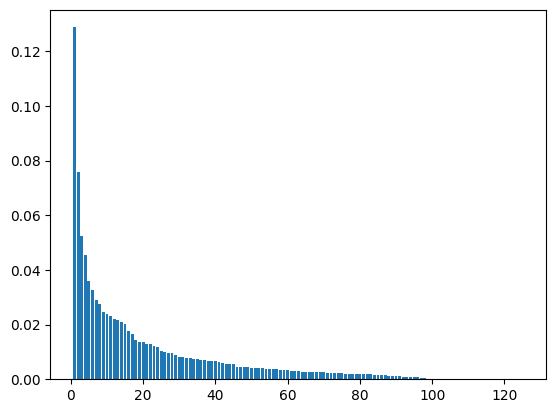

In [75]:
plt.bar(range(1,len(pca.explained_variance_ratio_)+1), pca.explained_variance_ratio_)

In [76]:
var_cumu = np.cumsum(pca.explained_variance_ratio_)

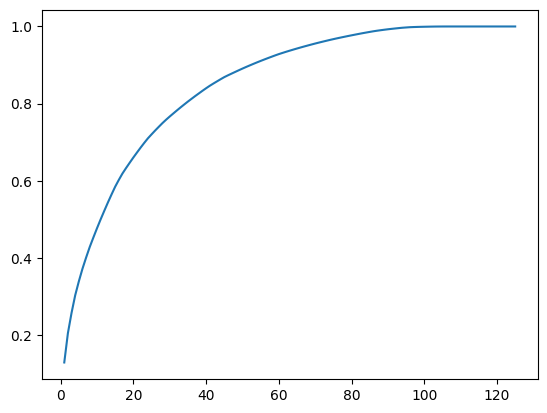

In [77]:
plt.plot(range(1,len(var_cumu)+1), var_cumu)

In [78]:
pc2 = PCA(n_components=50, random_state=42)

In [79]:
newdata = pc2.fit_transform(x)

In [80]:
newdata.shape

(48999, 50)

In [83]:
df = pd.DataFrame(newdata,)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49
0,-3.231425,0.642513,1.567862,-0.169644,3.522780,-2.094432,0.651142,3.107736,-0.113433,1.428933,0.013861,-0.262093,0.874242,-2.184496,-0.649033,0.685472,-1.315324,-2.524875,-1.624177,-0.536531,-0.307219,-1.465241,-0.497645,-0.692673,-0.501778,1.201138,-2.829791,-0.980306,-1.273426,-0.551043,0.732654,-0.315203,0.222381,0.239747,-0.884540,0.554540,0.081215,0.134387,0.253144,-0.533999,-1.294538,-0.543879,-0.566616,0.110390,-0.188044,0.774275,-0.079832,-0.267148,0.124635,-0.063838
1,-1.365778,-2.429134,-2.061893,1.410700,0.683335,-0.028016,1.086568,-1.363090,0.816828,-0.736437,-0.447359,0.078669,-0.712698,0.392060,1.162912,1.692610,-0.749893,-0.218049,-0.182076,0.283027,0.665030,0.912282,-0.210452,1.756137,0.370077,-0.713863,-0.511336,0.478414,-0.583529,-0.167056,0.737395,0.331709,-0.501260,0.233240,-0.403068,-0.039982,-0.259014,-0.539837,0.283420,0.307486,-0.126445,-0.179111,0.087431,-0.043351,0.063097,-0.020926,0.446833,-1.417876,-1.144185,0.266205
2,6.133337,-0.486651,-2.018815,-3.039107,-0.707756,1.345755,-0.545587,1.524990,-0.165665,-0.673115,-0.558921,0.155490,0.467006,-0.798708,-1.040139,-1.395969,1.311131,0.383158,-0.055331,0.218914,-0.062862,-0.459190,0.023055,-0.597597,0.483369,-1.822994,-0.212618,0.309902,-0.993913,0.075794,-1.121895,-0.848752,0.521866,-0.441046,0.190728,0.592116,0.133015,0.689552,-0.016852,1.338643,-0.688226,-0.004286,-0.284981,-0.325916,0.110954,0.258995,0.384406,-0.098986,-0.088459,-0.091369
3,-2.029505,-0.413119,-0.061797,0.515244,-1.268578,0.517812,-0.172969,0.068959,0.094948,-0.494586,-0.261656,0.135257,-1.310276,-0.368310,-0.283159,0.033576,-0.341629,0.421761,-0.819350,0.180610,0.311477,-0.491048,0.225172,-0.325978,-0.640762,-0.080336,0.176314,-0.706496,0.267577,-0.787948,-1.116608,-1.154263,0.300021,-0.251021,-0.107306,-0.006864,0.537954,0.000981,-0.012717,-0.343063,0.414030,0.839666,0.801223,-0.344564,0.080138,-0.007888,-0.646815,-0.229809,-0.060973,-0.168231
4,-1.346451,-2.079390,-0.808451,-0.187016,-1.335405,0.118186,-0.357176,-0.503662,-0.240342,0.220572,-0.322499,-0.042139,0.315484,-0.590585,0.697202,-1.016249,0.020692,0.554644,-0.671720,-0.419823,-0.040104,-0.479494,-0.040709,-0.391500,1.101017,0.465003,-0.099690,0.277554,-0.327346,0.440667,-1.169295,-0.590965,0.422511,-0.232057,0.224049,0.737601,0.034109,0.009186,-0.340544,1.413028,-0.666785,-0.386520,-0.488150,0.092036,-0.015443,0.020987,0.327176,0.239561,-0.094623,0.130858
